## Pokémon EDA

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [57]:
df = pd.read_csv("pokedex.csv")

In [58]:
def get_generation(pokedex_id):
    if 1 <= pokedex_id <= 151:
        return 1
    elif 152 <= pokedex_id <= 251:
        return 2
    elif 252 <= pokedex_id <= 386:
        return 3
    elif 387 <= pokedex_id <= 493:
        return 4
    elif 494 <= pokedex_id <= 649:
        return 5
    elif 650 <= pokedex_id <= 721:
        return 6
    elif 722 <= pokedex_id <= 809:
        return 7
    elif 810 <= pokedex_id <= 905:
        return 8
    elif 906 <= pokedex_id <= 1025:
        return 9
    else:
        return None

In [59]:
# Convert height units from decimeters to meters
df['height'] = df['height'] / 10
# Convert weight units from hectograms to kilograms
df['weight'] = df['weight'] / 10


In [60]:
# Add generation column
df['generation'] = df['id'].apply(get_generation)

In [61]:
# Add total base stat column
df['total'] = df[['hp', 'attack', 'defense', 's_attack', 's_defense', 'speed']].sum(axis=1)

In [62]:
df.shape

(1025, 15)

In [63]:
df.dtypes

id              int64
name           object
height        float64
weight        float64
hp              int64
attack          int64
defense         int64
s_attack        int64
s_defense       int64
speed           int64
type           object
evo_set         int64
info           object
generation      int64
total           int64
dtype: object

In [64]:
df.isna().sum()

id            0
name          0
height        0
weight        0
hp            0
attack        0
defense       0
s_attack      0
s_defense     0
speed         0
type          0
evo_set       0
info          0
generation    0
total         0
dtype: int64

In [65]:
df.head()

,id,name,height,weight,hp,attack,defense,s_attack,s_defense,speed,type,evo_set,info,generation,total
0,1,bulbasaur,0.7,6.9,45,49,49,65,65,45,"{grass,poison}",1,A strange seed was planted on its back at birt...,1,318
1,2,ivysaur,1.0,13.0,60,62,63,80,80,60,"{grass,poison}",1,"When the bulb on its back grows large, it appe...",1,405
2,3,venusaur,2.0,100.0,80,82,83,100,100,80,"{grass,poison}",1,The plant blooms when it is absorbing solar en...,1,525
3,4,charmander,0.6,8.5,39,52,43,60,50,65,{fire},2,"Obviously prefers hot places. When it rains, s...",1,309
4,5,charmeleon,1.1,19.0,58,64,58,80,65,80,{fire},2,"When it swings its burning tail, it elevates t...",1,405


In [66]:
df.describe()

,id,height,weight,hp,attack,defense,s_attack,s_defense,speed,evo_set,generation,total
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,1.211610,66.986537,70.184390,77.521951,72.507317,70.080976,70.205854,67.186341,253.195122,4.741463,427.686829
std,296.036315,1.248167,121.273114,26.631054,29.782541,29.286972,29.658378,26.639329,28.717227,159.505305,2.633633,112.770735
min,1.000000,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,1.000000,175.000000
25%,257.000000,0.500000,8.500000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,110.000000,3.000000,325.000000
50%,513.000000,1.000000,28.000000,68.000000,75.000000,70.000000,65.000000,67.000000,65.000000,257.000000,5.000000,450.000000
75%,769.000000,1.500000,70.000000,85.000000,100.000000,90.000000,90.000000,86.000000,88.000000,387.000000,7.000000,508.000000
max,1025.000000,20.000000,999.900000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,549.000000,9.000000,720.000000


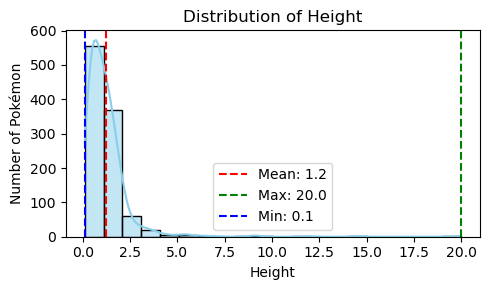

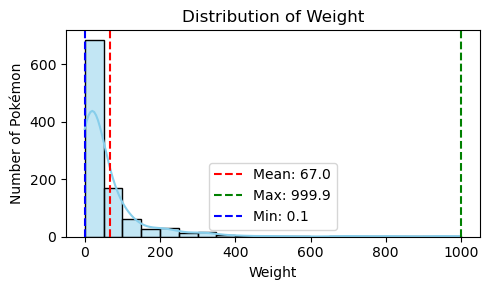

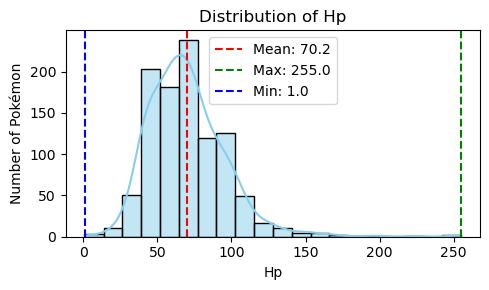

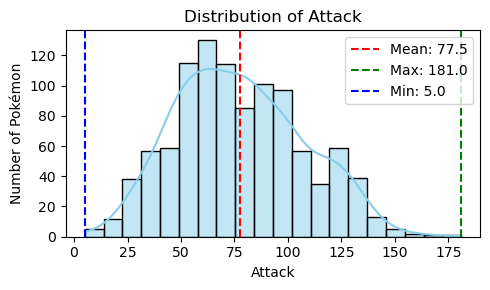

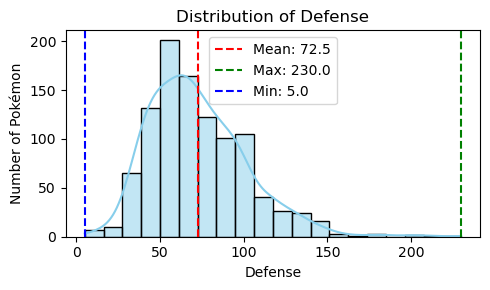

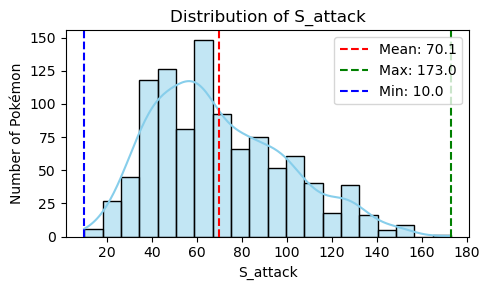

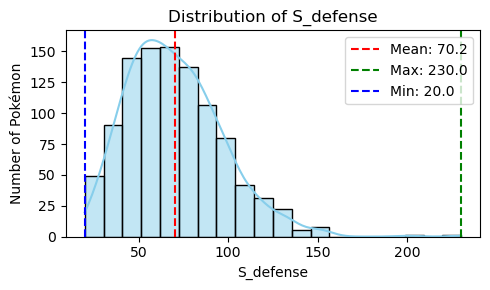

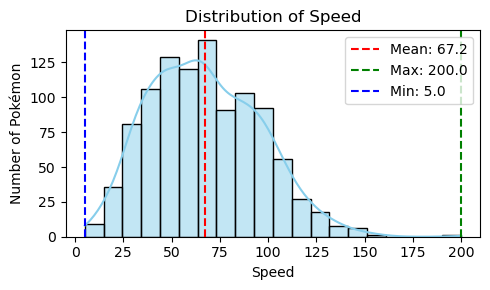

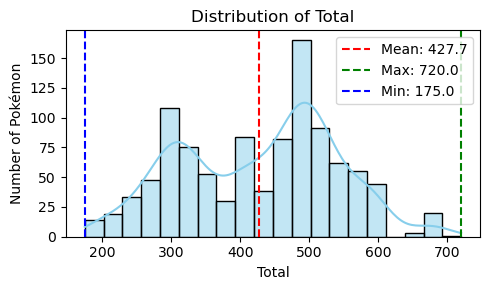

In [78]:
stats = ['height','weight', 'hp', 'attack', 'defense', 's_attack', 's_defense', 'speed', 'total']
for stat in stats:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[stat], bins=20, kde=True, color="skyblue", edgecolor="black")
    plt.axvline(df[stat].mean(), color='red', linestyle='--', label=f'Mean: {df[stat].mean():.1f}')
    plt.axvline(df[stat].max(), color='green', linestyle='--', label=f'Max: {df[stat].max():.1f}')
    plt.axvline(df[stat].min(), color='blue', linestyle='--', label=f'Min: {df[stat].min():.1f}')
    plt.title(f"Distribution of {stat.capitalize()}")
    plt.xlabel(f"{stat.capitalize()}")
    plt.ylabel("Number of Pokémon")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [68]:
# Number of Pokemon by type (primary and secondary types split)
type_counts = df['type'].value_counts()

In [69]:
all_types = []
    
for type_str in df['type']:
    if pd.notna(type_str):
        types = re.findall(r'\{(.*?)\}', type_str)
        if types:
            for t in types[0].split(','):
                all_types.append(t.strip())
type_counts = pd.Series(all_types).value_counts()

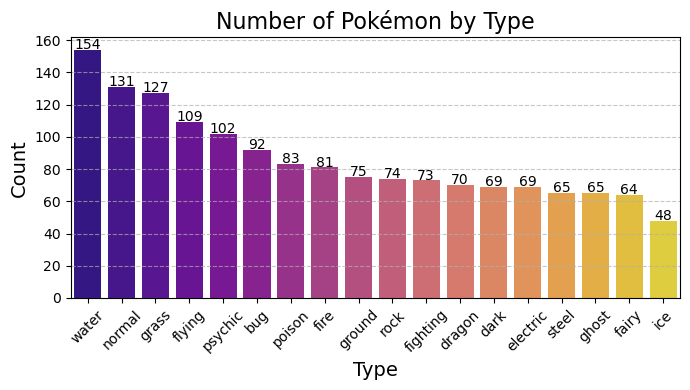

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='plasma')
plt.title('Number of Pokémon by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(type_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [71]:
# Number of Pokemon by generation
df['generation'].value_counts().sort_index()

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     88
8     96
9    120
Name: count, dtype: int64

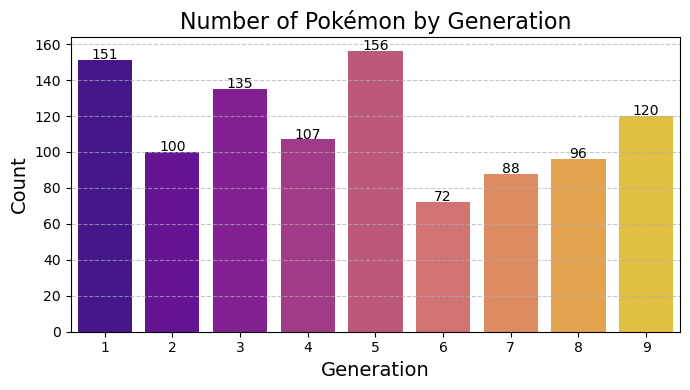

In [ ]:
gen_counts = df['generation'].value_counts().sort_index()

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='plasma')
plt.title('Number of Pokémon by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(gen_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [73]:
corr = df[stats].corr()
corr

,height,weight,hp,attack,defense,s_attack,s_defense,speed,total
height,1.000000,0.632440,0.482714,0.383843,0.347968,0.318759,0.275874,0.201195,0.505971
weight,0.632440,1.000000,0.476490,0.402300,0.446933,0.184609,0.264456,0.042833,0.456771
hp,0.482714,0.476490,1.000000,0.476141,0.299013,0.359616,0.369087,0.179877,0.667127
attack,0.383843,0.402300,0.476141,1.000000,0.465565,0.281880,0.226126,0.351055,0.714396
defense,0.347968,0.446933,0.299013,0.465565,1.000000,0.210107,0.503281,0.008047,0.629466
s_attack,0.318759,0.184609,0.359616,0.281880,0.210107,1.000000,0.493034,0.423150,0.701154
s_defense,0.275874,0.264456,0.369087,0.226126,0.503281,0.493034,1.000000,0.214105,0.697998
speed,0.201195,0.042833,0.179877,0.351055,0.008047,0.423150,0.214105,1.000000,0.553797
total,0.505971,0.456771,0.667127,0.714396,0.629466,0.701154,0.697998,0.553797,1.000000


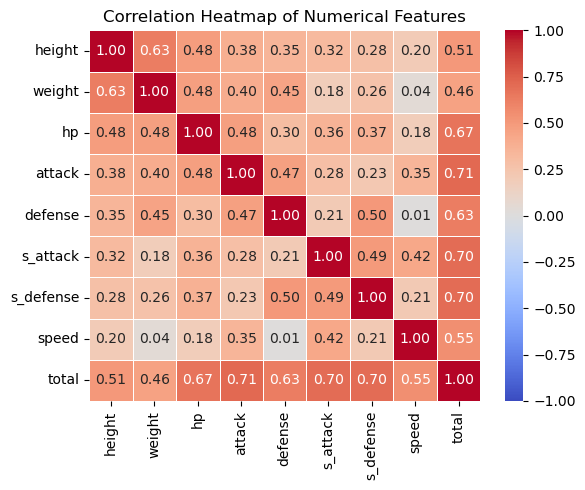

In [74]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

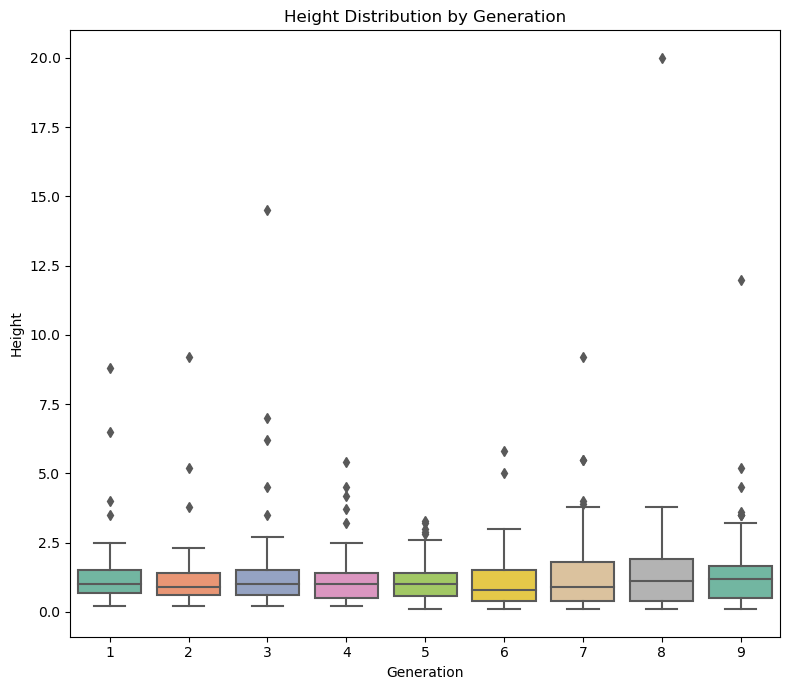

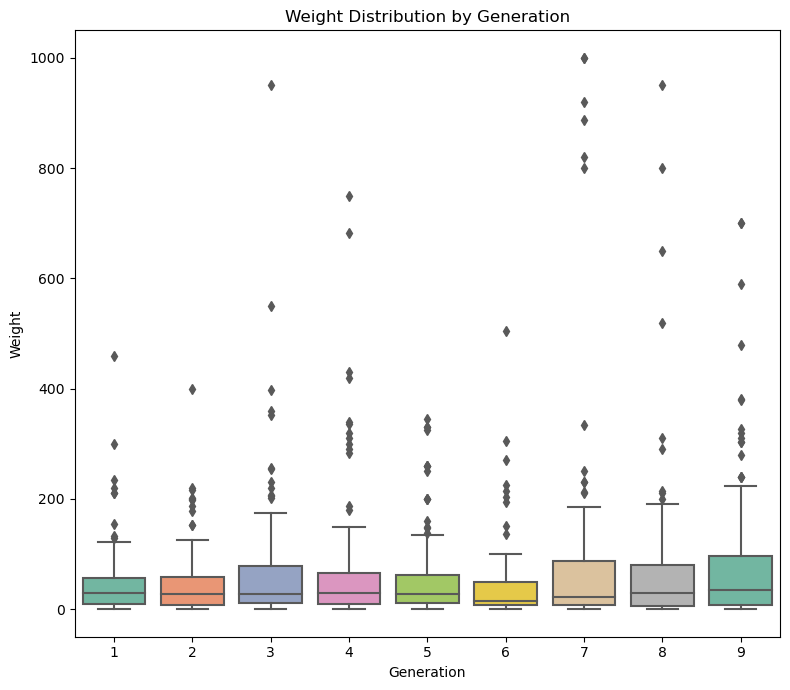

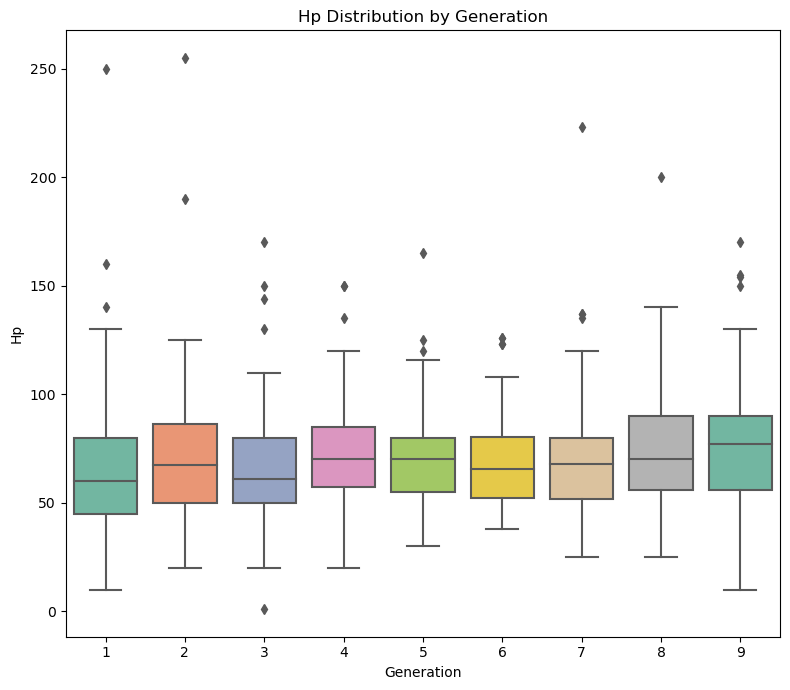

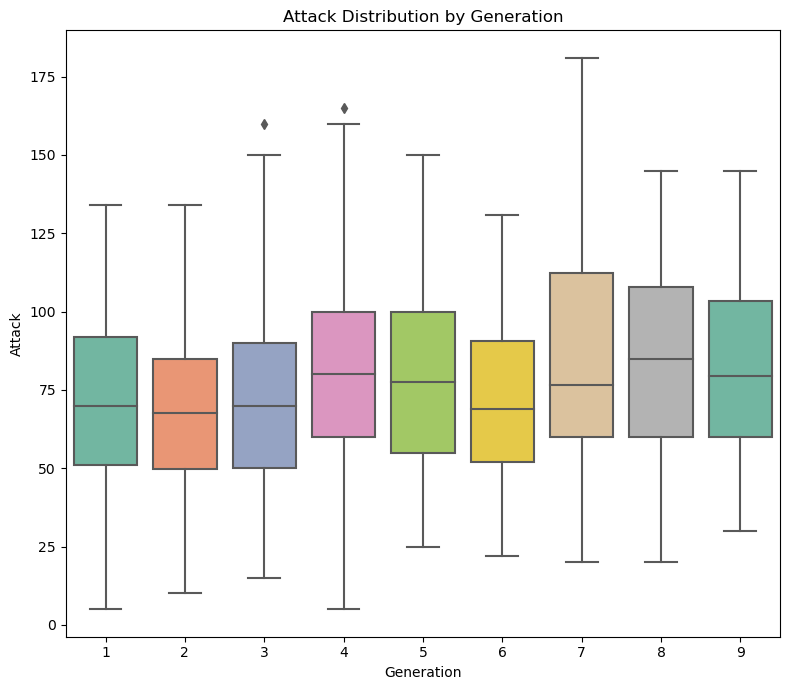

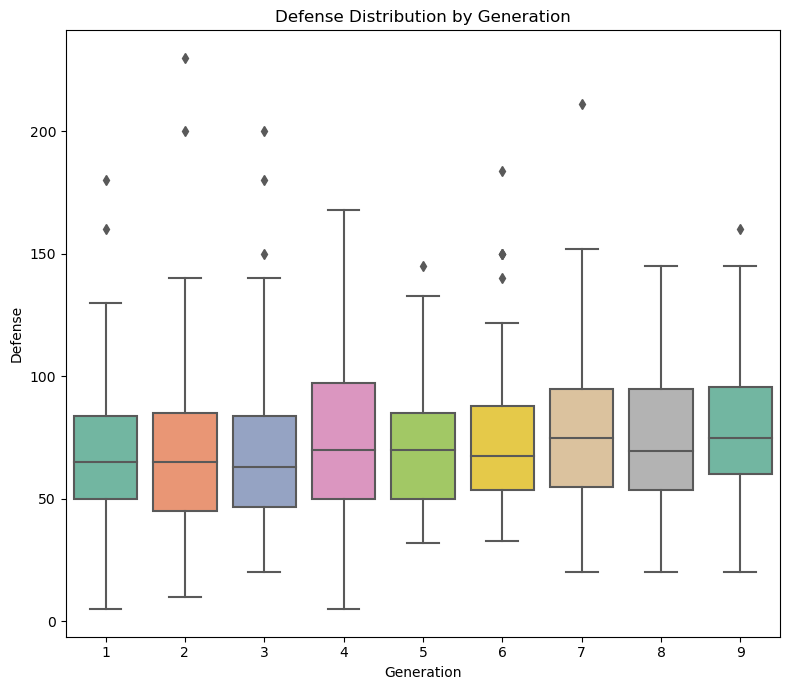

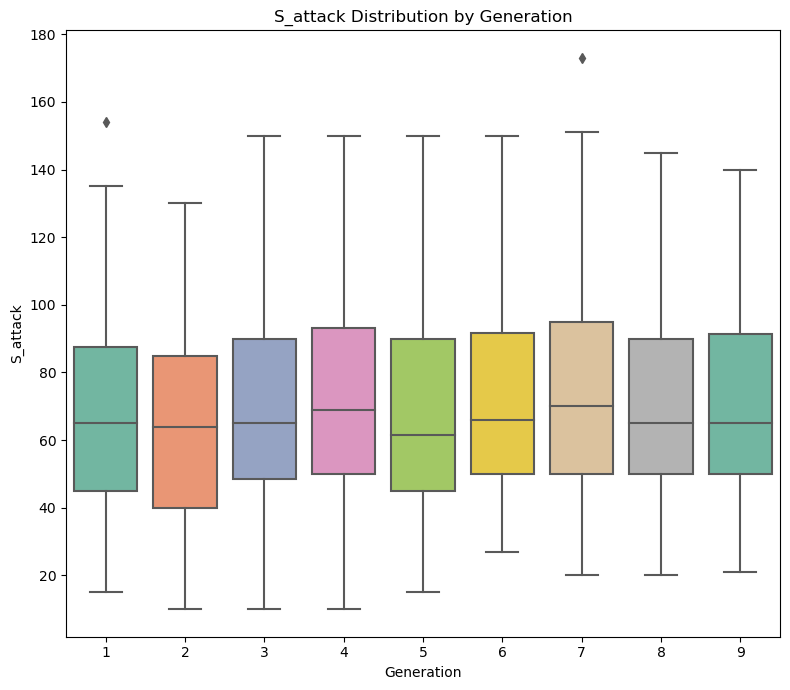

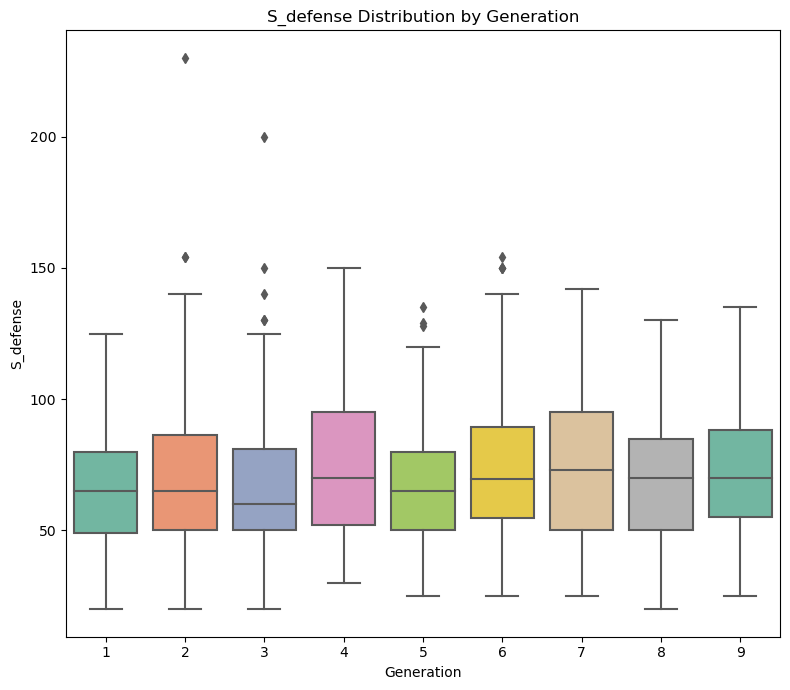

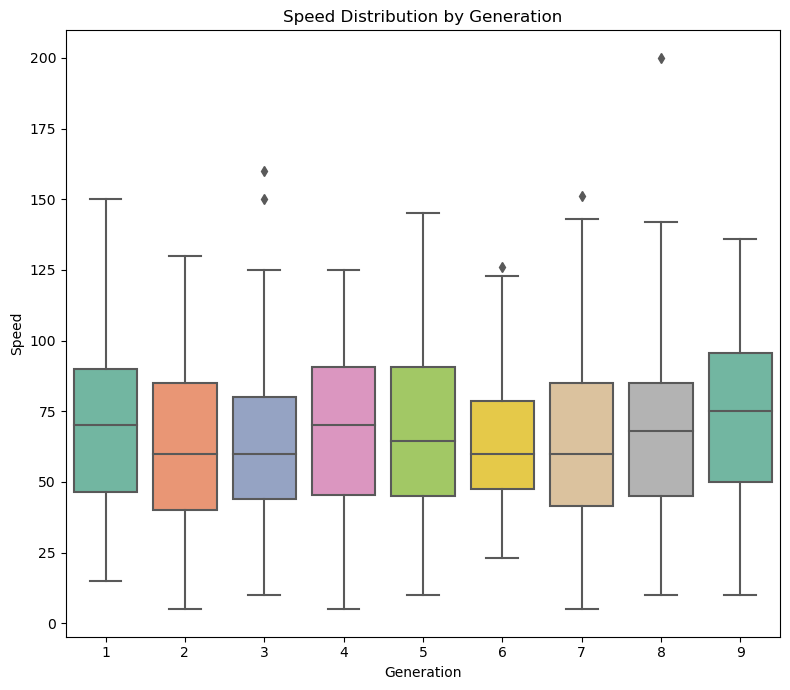

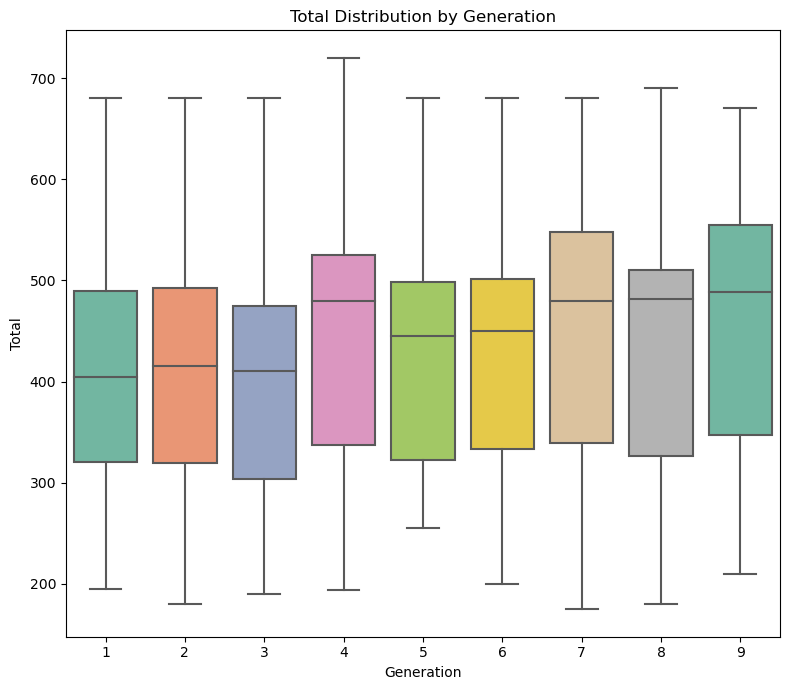

In [75]:
for stat in stats:
    plt.figure(figsize=(8, 7))
    sns.boxplot(x='generation', y=stat, data=df, palette="Set2")
    plt.title(f"{stat.capitalize()} Distribution by Generation")
    plt.xlabel("Generation")
    plt.ylabel(stat.capitalize())
    plt.tight_layout()
    plt.show()

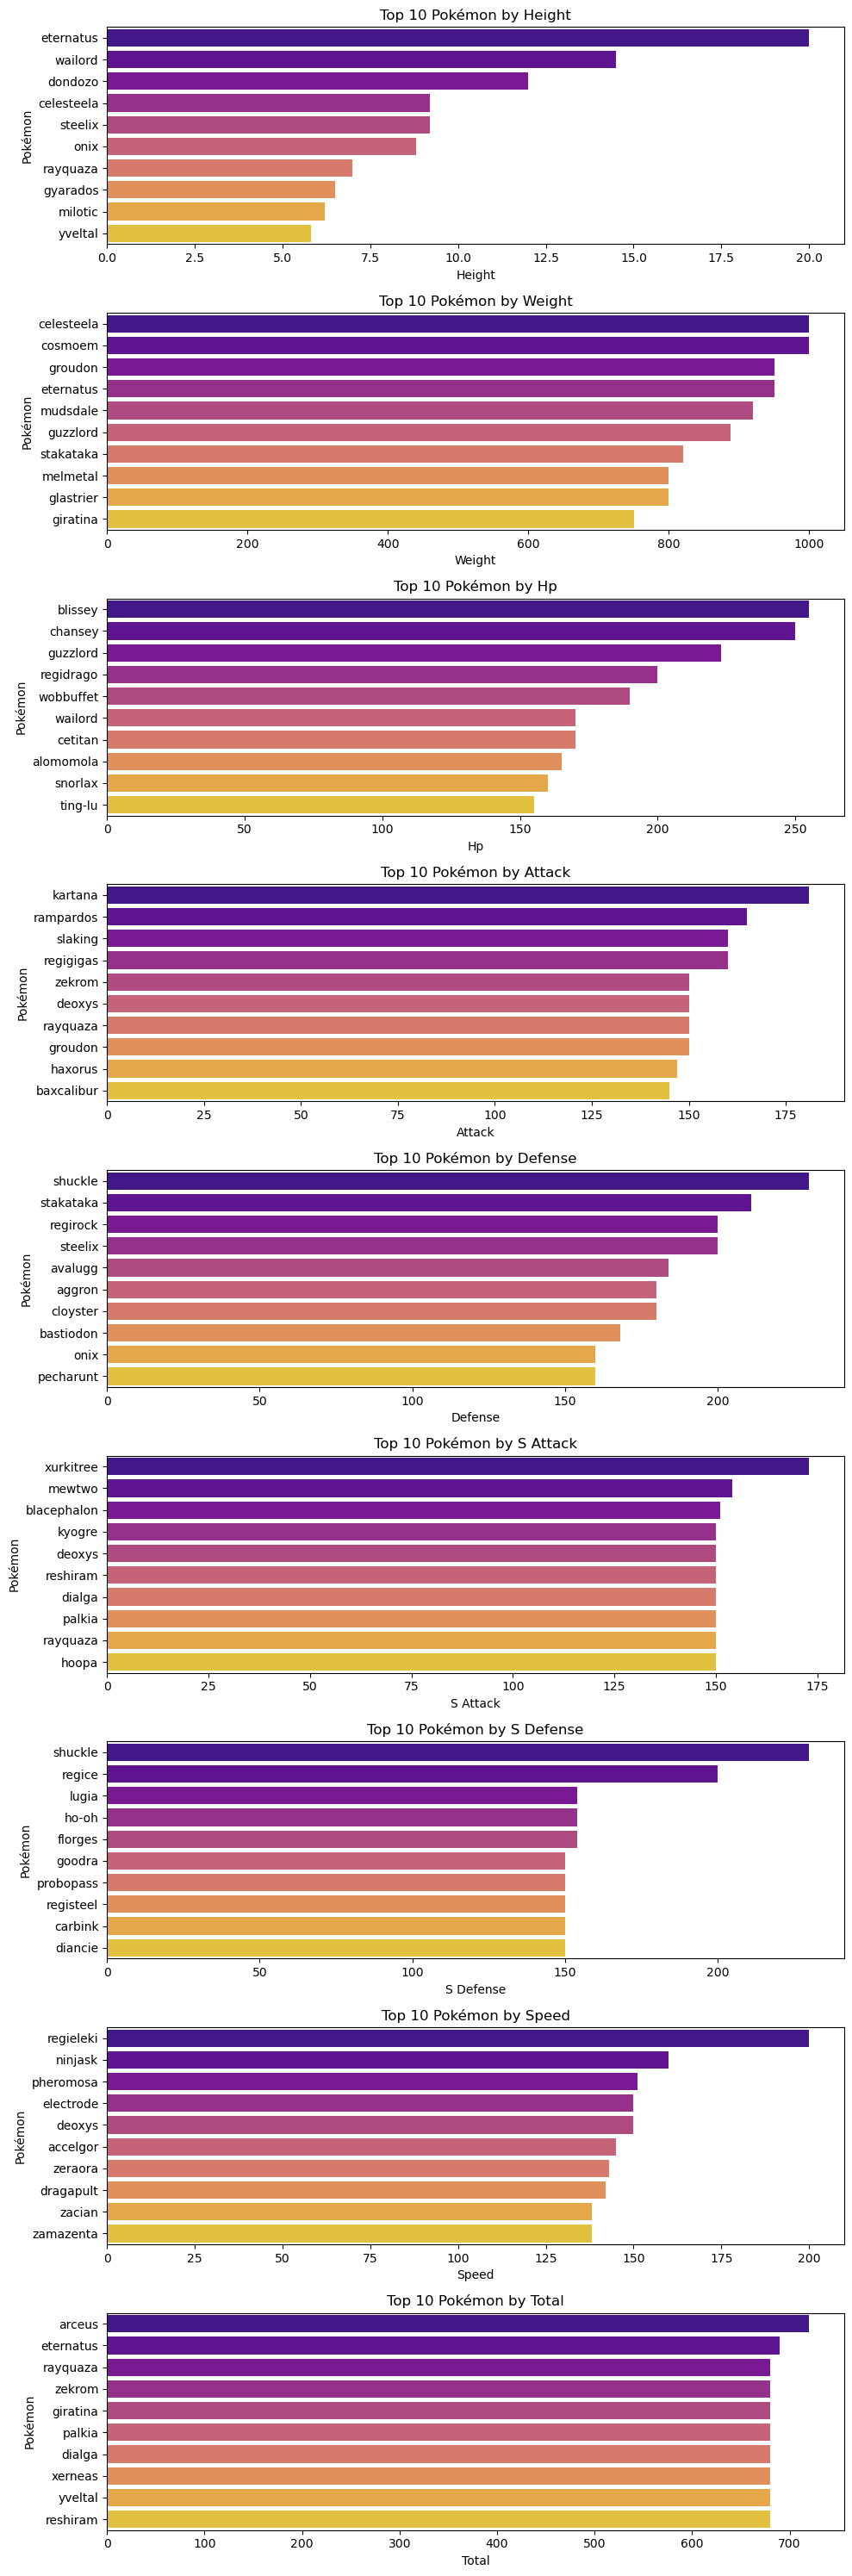

In [76]:
# Top 10 Pokemon in each stat category
fig, axes = plt.subplots(len(stats), 1, figsize=(10, 30))
    
for i, stat in enumerate(stats):

    top_stat = df.sort_values(by=stat, ascending=False).head(10)
    
    # Plot horizontal bar chart
    sns.barplot(x=stat, y='name', data=top_stat, ax=axes[i], palette='plasma')
    axes[i].set_title(f'Top {10} Pokémon by {stat.replace("_", " ").title()}')
    axes[i].set_xlabel(stat.replace("_", " ").title())
    axes[i].set_ylabel('Pokémon')

plt.tight_layout()
plt.show()